# Intro to ML Homework

## Week 12

### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

Machine learning is a type of artificial intelligence that uses algorithms to “learn” and update based on data gathered through use. It is primarily used to do determine causes, make predictions, and find and understand patterns.

Machine learning is good to use whenever you cannot code the rules for a model or you cannot scale them sufficiently. For example, recognizing and filtering spam can be done more effectively and with fewer errors by a machine learning model. As for scale, a machine learning model is also far more efficient at analyzing out of hundreds, thousands, or millions of emails in a short amount of time.

Another example is for advertising. Machine learning can recognize patterns in user behavior based on everything they click online, group them with users with similar profiles, and market products or services to them that have been popular among other users in the same group. 

If you find that an outcome is only affected by factors that are not actionable, meaning the current machine learning has not reached the expected opportunity, you should not scale up machine learning model to try to solve the problem, at least not right away. You probably need to collect more data, perform qualitative research (e.g., customer surveys), and/or ask different business questions. 

This may seem like it would only apply in cases where the desired outcome was not reached. However, it is possible to achieve a desired outcome but still conclude that the machine learning model failed. If the desired results have been achieved across the board (i.e., in both A (machine learning) and B (non–machine learning) groups), meaning there was an overall positive change/shift toward the desired outcome, it indicates that the machine learning model was not effective. It would be better to re-design to find out what else might be causing the change and prioritize that opportunity. However, after the first machine learning model failed, you could work on designing a different machine learning model to infer the more likely cause of the shift toward the desired outcome and then invest in that other opportunity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import time
from scipy import stats

df = pd.read_csv("loans_full_schema.csv")

pd.options.display.max_columns = None

In [2]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [4]:
df.value_counts

<bound method DataFrame.value_counts of                     emp_title  emp_length state homeownership  annual_income  \
0     global config engineer          3.0    NJ      MORTGAGE        90000.0   
1      warehouse office clerk        10.0    HI          RENT        40000.0   
2                    assembly         3.0    WI          RENT        40000.0   
3            customer service         1.0    PA          RENT        30000.0   
4        security supervisor         10.0    CA          RENT        35000.0   
...                       ...         ...   ...           ...            ...   
9995                   owner         10.0    TX          RENT       108000.0   
9996                 director         8.0    PA      MORTGAGE       121000.0   
9997                toolmaker        10.0    CT      MORTGAGE        67000.0   
9998                  manager         1.0    WI      MORTGAGE        80000.0   
9999       operations analyst         3.0    CT          RENT        66000.0   


Pre-processing step 1: Integer Encoding

In [5]:
#Because the "grade" category of data is ordinal, I converted it to numeric values.
#Initially, I planned to use "4" for "A" and go in descending order to correspond to how GPA is typically represented.
#However, I noticed that the grades are A, B, C, D, E, F, G, so I decided to go in ascending order, but with A-G = 7-1.
#First, I created a dictionary with grade letters as the keys and numbers as the values.
#Then, I used "map" to map the values onto the "grade" column, replacing the non-numeric A-G values.

grade_map = {"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1}
df["grade"] = df["grade"].map(grade_map)
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,5,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,5,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,7,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,5,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Pre-processing step 2: One-Hot Encoding

In [6]:
#First, I used df.nunique() to get the number of unique values in the columns of nominal data I was considering for one-hot encoding.
#The "homeownership" and "verified_income" columns each had three unique values, which I thought made them good candidates.
#The "loan_purpose" column had 12 unique values, so I preferred not to expand those into 12 separate columns. Additionally, I was not quite as interested in this factor because it did not seem likely that it would have the strongest correlation with loan repayment.

In [7]:
df['homeownership'].nunique()

3

In [8]:
df['verified_income'].nunique()

3

In [9]:
df['loan_purpose'].nunique()

12

In [10]:
#Next, I performed one-hot encoding on "homeownership" and "verified_income", which expanded each of these columns to three separate columns and encoded the nominal data to numeric, using combinations of 0 and 1 so as not to imply a specific order.
pd.get_dummies(df, columns=['homeownership', 'verified_income'])

,emp_title,emp_length,state,annual_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified
0,global config engineer,3.0,NJ,90000.0,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,5,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0,0,0,1
1,warehouse office clerk,10.0,HI,40000.0,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,5,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1,1,0,0
2,assembly,3.0,WI,40000.0,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1,0,1,0
3,customer service,1.0,PA,30000.0,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,7,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,1,0,0
4,security supervisor,10.0,CA,35000.0,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,5,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,108000.0,22.28,NaN,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,7,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,0,0,1,0,1,0
9996,director,8.0,PA,121000.0,32.38,NaN,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,4,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,1,0,0,0,0,1
9997,toolmaker,10.0,CT,67000.0,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,0,NaN,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,3,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,1,0,0,0,0,1
9998,manager,1.0,WI,80000.0,11.99,NaN,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,7,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,1,0,0,0,1,0


Pre-processing step 3: Cleaning up null values

In [11]:
#When "annual_joint_income" had a null value "NaN", I thought it was most reasonable to replace that value with the "annual_income" value.
#I did the same thing with "debt_to_income_joint", replacing NaNs with the values from "debt_to_income".
df.annual_income_joint.fillna(df.annual_income, inplace=True)
df.debt_to_income_joint.fillna(df.debt_to_income, inplace=True)

df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,NaN,18.01,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,5,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,NaN,5.04,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,5,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,NaN,21.15,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,NaN,10.16,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,7,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,5,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Pre-processing step 4: Cleaning up formatting of data

In [12]:
#Cleaning up formatting of "issue_month":
import datetime
df['issue_month'] = df.issue_month.apply(
    lambda x: pd.to_datetime(x).strftime('%Y-%m'))
df.head()
#I converted the issue month to year-month format because it is more useful for sorting dates.

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,NaN,18.01,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,5,C3,2018-03,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,NaN,5.04,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,5,C1,2018-02,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,NaN,21.15,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,2018-02,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,NaN,10.16,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,7,A3,2018-01,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,5,C3,2018-03,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [13]:
#Next, I converted the data in several rows from floats to integers when all values ended in ".0" (trailing zero).
df[['emp_length','annual_income','annual_income_joint','months_since_last_delinq','months_since_90d_late','months_since_last_credit_inquiry','num_accounts_120d_past_due','paid_late_fees']] = df[['emp_length','annual_income','annual_income_joint','months_since_last_delinq','months_since_90d_late','months_since_last_credit_inquiry','num_accounts_120d_past_due','paid_late_fees']].fillna(0).astype(int)

In [14]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3,NJ,MORTGAGE,90000,Verified,18.01,90000,NaN,18.01,0,38,2001,6,28,10,70795,38767,0,0,38,0,1250,2,5,5,10,0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,5,C3,2018-03,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0
1,warehouse office clerk,10,HI,RENT,40000,Not Verified,5.04,40000,NaN,5.04,0,0,1996,1,30,14,28800,4321,0,1,0,0,0,0,11,8,14,0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,5,C1,2018-02,Current,whole,Cash,4651.37,499.12,348.63,150.49,0
2,assembly,3,WI,RENT,40000,Source Verified,21.15,40000,NaN,21.15,0,28,2006,4,31,10,24193,16000,0,0,28,0,432,1,13,7,10,0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,2018-02,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0
3,customer service,1,PA,RENT,30000,Not Verified,10.16,30000,NaN,10.16,0,0,2007,0,4,4,25400,4997,0,1,0,0,0,1,1,15,4,0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,7,A3,2018-01,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0
4,security supervisor,10,CA,RENT,35000,Verified,57.96,57000,Verified,37.66,0,0,2008,7,22,16,69839,52722,0,0,0,0,0,1,6,4,16,0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,5,C3,2018-03,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0


Pre-processing step 5: Deleting empty column

In [15]:
#The first time I created a correlation matrix and heatmap for this data, I noticed that there was a large white cross in the middle, splitting it into four equal parts. 
#This appeared to indicate that the "num_accounts_120d_past_due" column did not contain any non-zero, non-null values, which I confirmed using the following code:
np.count_nonzero(df["num_accounts_120d_past_due"])

0

In [16]:
#So, I used this code to delete that column:
del df['num_accounts_120d_past_due']

### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [17]:
corrMatrix = df.corr()
corrMatrix

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,grade,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.149330,-0.008363,0.135393,0.035921,0.012520,0.035044,-0.129035,0.017820,0.135199,0.083867,0.168798,0.068504,-0.015697,0.014755,0.028719,-0.008829,0.006828,-0.032613,0.038275,0.014077,0.083756,-0.008829,0.075299,0.103189,0.123626,0.094207,0.100717,0.183998,0.000767,0.016351,0.001299,0.118437,0.065297,-0.032332,0.101396,0.031666,0.109452,0.042122,0.033059,0.074080,-0.006988
annual_income,0.149330,1.000000,-0.180445,0.900981,-0.179166,0.052236,0.033180,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,-0.008330,0.025976,0.016682,0.001665,-0.000080,0.096542,0.094446,-0.014940,0.176957,0.001665,0.156078,0.328861,0.123963,0.112329,0.125455,0.243188,-0.010542,0.047439,-0.030568,0.324665,0.044843,-0.099584,0.315693,0.096714,0.280170,0.162005,0.141893,0.174154,-0.005372
debt_to_income,-0.008363,-0.180445,1.000000,-0.021525,0.631456,-0.027517,-0.013860,-0.089700,0.025388,0.198647,0.217078,0.075174,0.238155,-0.011200,-0.004146,-0.027505,0.007342,0.019175,0.200470,0.067724,0.033571,0.217000,0.007342,0.147478,0.065328,0.128341,0.136041,0.189845,0.033365,0.076636,-0.008522,0.006560,0.056329,0.046490,0.141653,0.066408,-0.134950,0.065996,-0.003918,-0.020116,0.121160,-0.010176
annual_income_joint,0.135393,0.900981,-0.021525,1.000000,-0.143928,0.051163,0.024904,-0.171233,0.088925,0.208210,0.167457,0.540307,0.417591,-0.016085,0.017006,0.000781,0.000124,0.000608,0.098966,0.071721,-0.015750,0.168083,0.000124,0.129582,0.320941,0.117114,0.097763,0.110283,0.270525,-0.003014,0.040409,-0.036481,0.381142,0.076964,-0.081610,0.366360,0.079199,0.336887,0.172484,0.146345,0.220876,0.002685
debt_to_income_joint,0.035921,-0.179166,0.631456,-0.143928,1.000000,-0.038508,-0.001855,-0.109084,0.026848,0.280724,0.319589,0.071085,0.318850,-0.017855,-0.003470,-0.027376,0.014446,-0.011619,0.296894,0.106589,0.035427,0.318825,0.014446,0.211979,0.102399,0.176971,0.201113,0.266290,0.014010,0.105865,-0.002214,-0.003179,0.006294,0.037621,0.217161,0.029553,-0.208055,0.024058,-0.028911,-0.045441,0.120047,-0.015498
delinq_2y,0.012520,0.052236,-0.027517,0.051163,-0.038508,1.000000,-0.043939,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,0.077680,-0.026574,0.062865,0.026097,0.011577,0.005762,-0.062541,0.006268,0.012409,0.026097,-0.026848,-0.085512,0.060118,0.000471,-0.002676,0.063506,-0.444056,-0.005303,-0.044865,-0.033258,-0.025936,0.090456,-0.013724,-0.090879,-0.031440,-0.004490,-0.006857,0.017165,-0.009391
months_since_last_delinq,0.035044,0.033180,-0.013860,0.024904,-0.001855,-0.043939,1.000000,-0.095962,0.068659,0.112288,0.043257,0.024245,0.025799,0.018835,-0.002537,0.584461,-0.006468,0.035233,0.044747,0.095584,-0.016909,0.043082,-0.006468,-0.023721,-0.103382,0.069072,0.019698,0.018518,0.069637,-0.397052,0.021137,-0.042403,-0.009104,0.014087,0.069373,-0.004215,-0.075715,-0.004598,-0.007947,-0.011610,0.026397,-0.007630
earliest_credit_line,-0.129035,-0.156001,-0.089700,-0.171233,-0.109084,-0.078109,-0.095962,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,-0.000813,-0.031572,-0.100811,-0.018333,-0.018070,0.016580,0.024696,-0.001282,-0.172642,-0.018333,-0.128726,-0.239871,-0.310678,-0.184406,-0.167074,-0.287344,0.099086,-0.013752,-0.040181,-0.1177

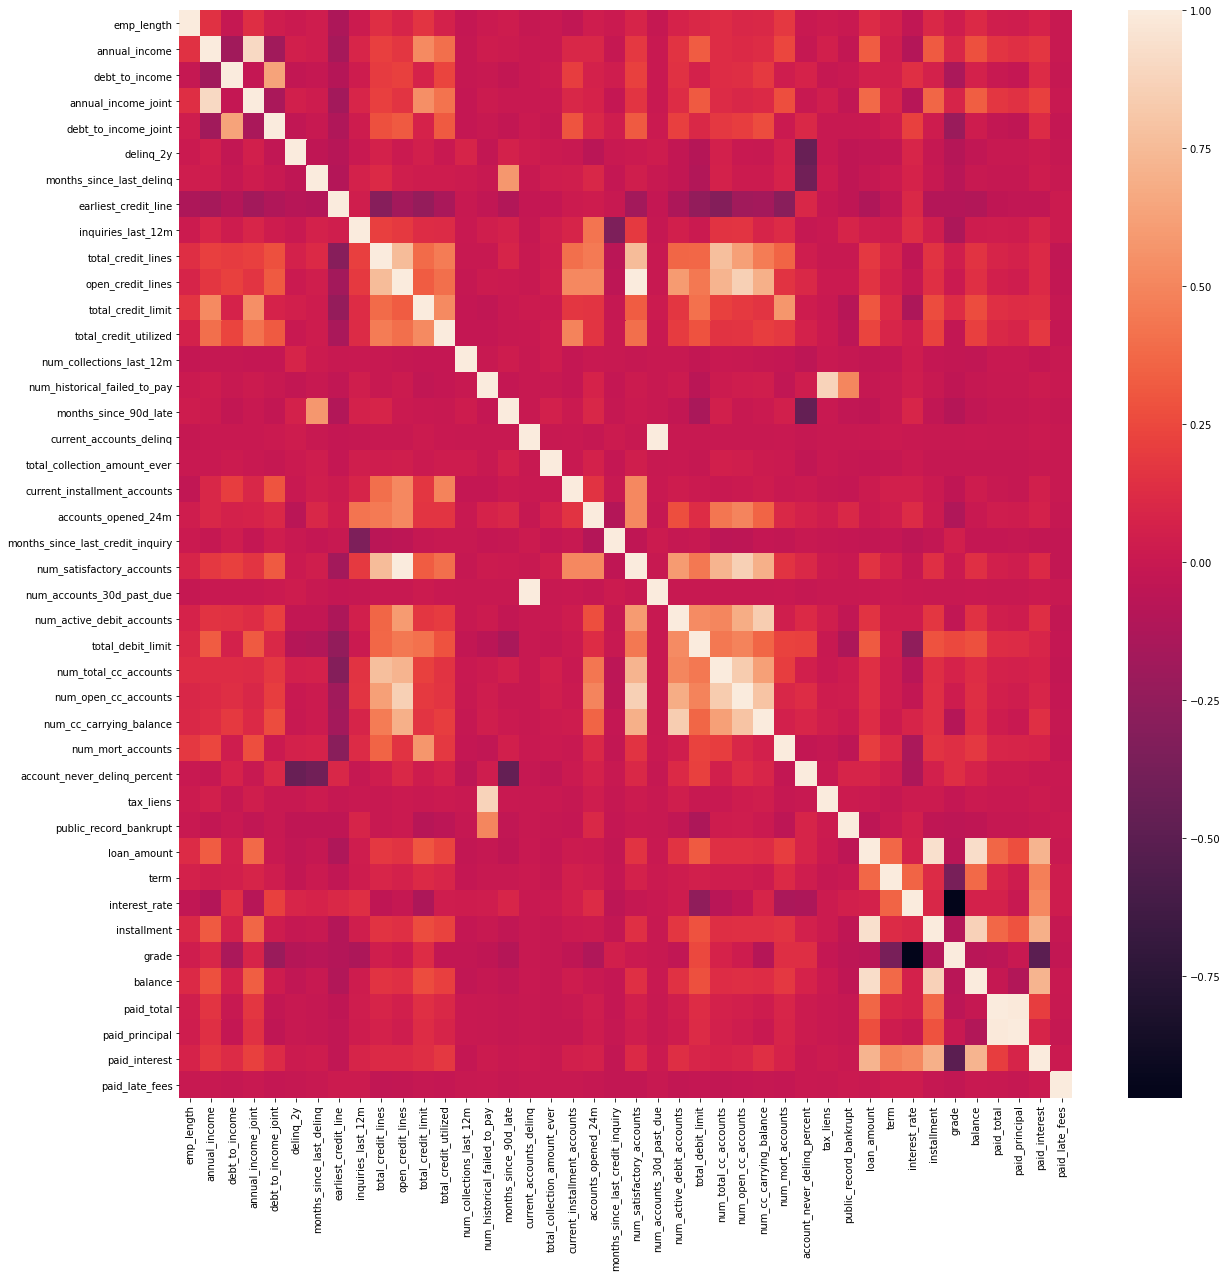

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix)
plt.show()

total_credit_utilized	open_credit_lines	0.406047
open_credit_lines	total_credit_utilized	0.406047
num_satisfactory_accounts	total_credit_utilized	0.406134
total_credit_utilized	num_satisfactory_accounts	0.406134
annual_income	total_credit_utilized	0.406370
...	...	...
interest_rate	grade	0.969402
paid_principal	paid_total	0.991473
paid_total	paid_principal	0.991473
num_satisfactory_accounts	open_credit_lines	0.999481
open_credit_lines	num_satisfactory_accounts	0.999481

The first time I created a correlation matrix and heatmap for this data, I noticed that there was a large white cross in the middle, splitting it into four equal parts. This indicated that the "num_accounts_120d_past_due" column did not contain any non-zero, non-null values, so I deleted it.

I did not find a super-strong correlation between “loan_amount” and any other factor, which surprised me. Perhaps since these a smallish loans (relative to something like a mortgage), the bank is more apt to approve up to $40,000 even to those who do not have high credit scores, but they charging higher interest rates to people with below-average credit history.

There were negative correlations between “earliest_credit_line” and the following:

    •	“num_mort_accounts”

    •	“num_total_cc_accounts”

    •	“total_credit_lines”

    •	“total_credit_limit”


I found this surprising at first, but then I remembered that the older the person’s first credit line was, the lower that number would be in numeric format (e.g., 2020 vs. 2011 corresponds to 1 year vs. 10 years). So this actually just confirmed that various standard markers of a high credit score correspond to one another.

There was a negative correlation between interest rate and grade, as expected.

As expected, I found strong positive correlations between “annual_income” and “annual_joint_income,” between “loan_amount and both “balance” and “installment” (meaning either the principal or the monthly minimum payment, maybe?), and between “tax_liens” and “num_historical_failed_to_pay”.

### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

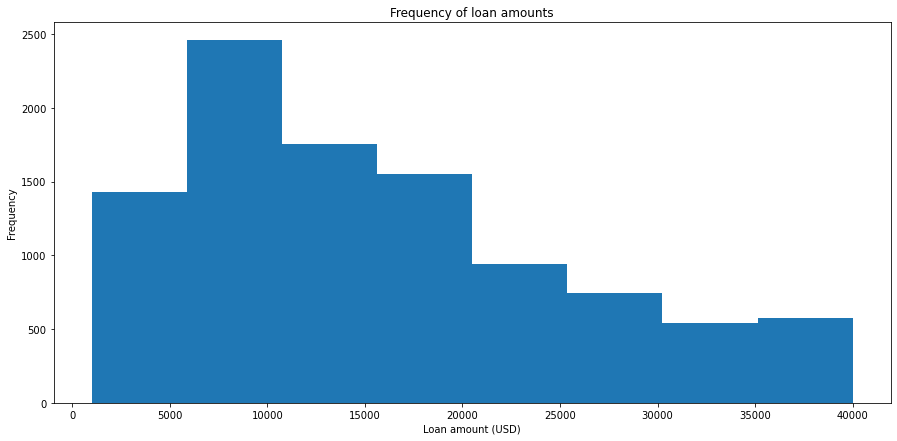

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(df["loan_amount"], bins=8)
#df["loan_amount"].hist(figsize=(30,12), bins=8)
ax.set_title("Frequency of loan amounts")
ax.set_xlabel("Loan amount (USD)")
ax.set_ylabel("Frequency")
plt.show()

I divided the loan amounts into eight bins because the majority of the loans were in increments of \\$5,000, and the eight bins worked out to be roughly \\$5,000 each. I had tested it with more, and thus smaller, bins (e.g., 16), but the amounts/bars went up and down a bunch of times because most of the data was falling into whichever bins contained increments of \\$5,000. 

It looks like the range of approximately \\$7,000 to \\$12,000 had the highest frequency, at about 2,500. The range below that (under \\$7,000, approximately), was the lowest loan amount bin and had a frequency of almost 1,500, and the two ranges above it (approx. \\$12,000 to \\$16,000 and \\$16,000 to \\$20,500) had frequencies of about 1,750 and 1,600, respectively. From there, the frequencies decreased as the loan amounts grew higher, ,with only a tiny increase between the last two bins. The maximium loan amount in this data was \\$40,000, suggesting that the maximum amount a customer could borrow with this type of loan was capped at \\$40,000. 

### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

#### a.	Is there a better way to do this than with a lambda? 

#### b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


For question 5, I started by creating a ictionary that assigned each state (and Washington, DC) to one of the five regions.

In [20]:
regions = {"WA":"Pacific",
           "OR":"Pacific",
           "ID":"Pacific",
           "CA":"Pacific",
           "UV":"Pacific",
           "UT":"Pacific",
           "AZ":"Pacific",
           "NV":"Pacific",
           "AK":"Pacific",
           "HI":"Pacific",
           "MT":"Plains",
           "ND":"Plains",
           "SD":"Plains",
           "WY":"Plains",
           "NE":"Plains",
           "CO":"Plains",
           "KS":"Plains",
           "OK":"Plains",
           "NM":"Plains",
           "TX":"Plains",
           "MN":"Midwest",
           "WI":"Midwest",
           "IA":"Midwest",
           "MO":"Midwest",
           "IL":"Midwest",
           "IN":"Midwest",
           "MI":"Midwest",
           "OH":"Midwest",
           "KY":"Midwest",
           "ME":"Northeast",
           "VT":"Northeast",
           "NH":"Northeast",
           "NY":"Northeast",
           "MA":"Northeast",
           "CT":"Northeast",
           "RI":"Northeast",
           "PA":"Northeast",
           "NJ":"Northeast",
           "WV":"Northeast",
           "DE":"Northeast",
           "MD":"Northeast",
           "VA":"Northeast",
           "DC":"Northeast",
           "AR":"Southeast",
           "TN":"Southeast",
           "NC":"Southeast",
           "SC":"Southeast",
           "LA":"Southeast",
           "MS":"Southeast",
           "AL":"Southeast",
           "GA":"Southeast",
           "FL":"Southeast"}

Here is the first method for adding the region column, using lambda. I also used performance counter so that I can compare the performance/speed of this method with that of an alternate method in 5b.

In [21]:
#5.
#Using lambda.
#Using performance counter to see which is more "performant":
tic = time.perf_counter()
df['region'] = df['state'].apply(lambda k: regions[k])
toc = time.perf_counter()
difference = toc - tic
print(difference)

0.0033039580000000512


5a. I believe "map" could be a better way to do this, but we'll compare the methods in the next step (5b).

5b. Next, for question 5 part b, I created another region column ("region2"), using map and did not use lambda. I used performance counter again, as well.

In [22]:
#5a.
#Using map (without lambda).
#Using performance counter:
tic = time.perf_counter()
df['region2']= df['state'].map(regions)
toc = time.perf_counter()
difference = toc - tic
print(difference)

0.003678212999999708


5b. By comparing the speeds of the two methods, we can see that laambda was faster (0.0021322990000003372) than map (0.0034274359999999504). We can also look at the two new columns to confirm that both methods returned the same results.

In [23]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region,region2
0,global config engineer,3,NJ,MORTGAGE,90000,Verified,18.01,90000,NaN,18.01,0,38,2001,6,28,10,70795,38767,0,0,38,0,1250,2,5,5,10,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,5,C3,2018-03,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0,Northeast,Northeast
1,warehouse office clerk,10,HI,RENT,40000,Not Verified,5.04,40000,NaN,5.04,0,0,1996,1,30,14,28800,4321,0,1,0,0,0,0,11,8,14,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,5,C1,2018-02,Current,whole,Cash,4651.37,499.12,348.63,150.49,0,Pacific,Pacific
2,assembly,3,WI,RENT,40000,Source Verified,21.15,40000,NaN,21.15,0,28,2006,4,31,10,24193,16000,0,0,28,0,432,1,13,7,10,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,2018-02,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0,Midwest,Midwest
3,customer service,1,PA,RENT,30000,Not Verified,10.16,30000,NaN,10.16,0,0,2007,0,4,4,25400,4997,0,1,0,0,0,1,1,15,4,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,7,A3,2018-01,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0,Northeast,Northeast
4,security supervisor,10,CA,RENT,35000,Verified,57.96,57000,Verified,37.66,0,0,2008,7,22,16,69839,52722,0,0,0,0,0,1,6,4,16,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,5,C3,2018-03,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0,Pacific,Pacific


### 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

Here are the subplots for the five regions:

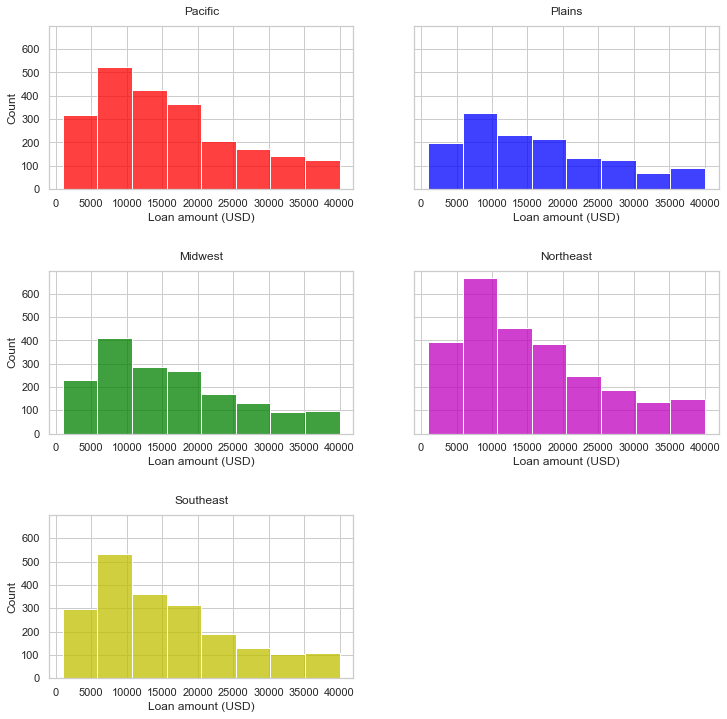

In [24]:
sns.set_style("whitegrid")
sns.set_context("notebook")

fig, axes = plt.subplots(3, 2, figsize =(12,12), sharey=True)
plt.subplots_adjust(hspace = 0.5)
axes[2][1].set_visible(False)

ax = sns.histplot(df[df["region"] == "Pacific"]["loan_amount"], ax=axes[0,0], bins = 8, color = "r")
ax.set(xlabel = "Loan amount (USD)")
ax.set_title("Pacific",
           y=1.03)

ax1 = sns.histplot(df[df["region"] == "Plains"]["loan_amount"], ax=axes[0,1], bins = 8, color = "b")
ax1.set(xlabel = "Loan amount (USD)")
ax1.set_title("Plains",
           y=1.03)

ax2 = sns.histplot(df[df["region"] == "Midwest"]["loan_amount"], ax=axes[1,0], bins = 8, color = "g")
ax2.set(xlabel = "Loan amount (USD)")
ax2.set_title("Midwest",
           y=1.03)

ax3 = sns.histplot(df[df["region"] == "Northeast"]["loan_amount"], ax=axes[1,1], bins = 8, color = "m")
ax3.set(xlabel = "Loan amount (USD)")
ax3.set_title("Northeast",
           y=1.03)

ax4 = sns.histplot(df[df["region"] == "Southeast"]["loan_amount"], ax=axes[2,0], bins = 8, color = "y")
ax4.set(xlabel = "Loan amount (USD)")
ax4.set_title("Southeast",
           y=1.03)

plt.show()

Based on these subplots, it looks like More loans are taken out in the Northeast region than anywhere else, followed by the Pacific region, Southeast, Midwest, and finally Plains. I suspect the number of loans taken out in each region is affected by population and possibly by cost of living. However, because all regions show a similar requency pattern/shape, in which the range of approximately \\$7,000 to \\$12,000 had the highest frequency, I don't think cost of living as the primary factor. If it was, I would expect the Northeast region to skew higher with regard to the amount takemn out in most loans.